In [3]:
from cvrp_algorithms import SimpleAco, AcoSigmaBestAnts, AcoImprovedPheromoneUpdate, Aco2opt, Greedy
import cvrpcases as cvrp
from array import *
import math
import matplotlib.pyplot as plt
import numpy as np
import time
from matplotlib.backends.backend_pdf import PdfPages

def listToString(list):
    str1 = ''   
    for ele in list:  
        str1 += str(ele)+'\n' 
    str1 = str1[:-2] 
    return str1  

def saveFile(firstLine, vector, file):
    text_file = open(file, "w+")
    text_file.write(firstLine+'\n')
    n = text_file.write(listToString(vector))
    text_file.close()

def readVector(file):
    file1 = open(file, 'r') 
    Lines = file1.readlines() 
    v = np.zeros(len(Lines)-1)
    for it in range(len(v)):
        v[it] = float(Lines[it+1])
    return v

In [65]:
print("Hipoteza 1: Jak liczba iteracji wpływa na jakość rozwiązania? - przypadek 1 - algorytm - SimpleAco")

seedCount = 8
iterationCount = 100
iterationJump = 2

cases =[
r'datasets\A\A-n32-k5.vrp',
r'datasets\A\A-n33-k5.vrp',
r'datasets\A\A-n33-k6.vrp',
r'datasets\A\A-n34-k5.vrp',
r'datasets\A\A-n36-k5.vrp',
r'datasets\A\A-n37-k5.vrp',
r'datasets\A\A-n37-k6.vrp',
r'datasets\A\A-n38-k5.vrp',
r'datasets\A\A-n39-k5.vrp',
r'datasets\A\A-n39-k6.vrp']



#hyp1_1 = [[[0 for z in range(len(cases))] for x in range(seedCount)] for y in range(0,math.floor(iterationCount/iterationJump))] 
hyp1_1 = np.zeros((math.floor(iterationCount/iterationJump), seedCount, len(cases)))


for cas in range(len(cases)):
    for it in range(1,iterationCount+1,iterationJump):
        print(it)
        for seed in range(seedCount):
            algorithm = SimpleAco(cvrp.load_case(cases[cas]), ants_count=10, max_iterations=it, alpha=2, beta=5, evaporation_rate=0.6, pheromone_amount=0, seed = seed)
            solution, path = algorithm.compute(log_level=0)
            hyp1_1[math.floor(it/iterationJump)][seed][cas] = solution

sums = np.zeros((math.floor(iterationCount/iterationJump), seedCount))
for seed in range(seedCount):
    for it in range(1,iterationCount+1,iterationJump):
        sums[math.floor(it/iterationJump),seed] = np.sum(hyp1_1[math.floor(it/iterationJump),seed,:])

mean1 = np.zeros(len(sums))
sd1 = np.zeros(len(sums))
for i in range(len(sums)):
    mean1[i] = np.mean(sums[i,:])
    sd1[i] = np.std(sums[i,:])
saveFile('mean1  ants_count=10, max_iterations=it, alpha=2, beta=5, evaporation_rate=0.6, pheromone_amount=0, seed = seed',mean1,r'results/h1/mean1.txt')
saveFile('sd1  ants_count=10, max_iterations=it, alpha=2, beta=5, evaporation_rate=0.6, pheromone_amount=0, seed = seed',sd1,r'results/h1/sd1.txt')

hyp1_2 = np.zeros((math.floor(iterationCount/iterationJump), seedCount, len(cases)))

for cas in range(len(cases)):
    for it in range(1,iterationCount+1,iterationJump):
        print(it)
        for seed in range(seedCount):
            algorithm = AcoSigmaBestAnts(cvrp.load_case(cases[cas]), ants_count=10, max_iterations=it, alpha=2, beta=5, evaporation_rate=0.6, pheromone_amount=0, sigma = 1, seed = seed)
            solution, path = algorithm.compute(log_level=0)
            hyp1_2[math.floor(it/iterationJump)][seed][cas] = solution

sums = np.zeros((math.floor(iterationCount/iterationJump), seedCount))
for seed in range(seedCount):
    for it in range(1,iterationCount+1,iterationJump):
        sums[math.floor(it/iterationJump),seed] = np.sum(hyp1_2[math.floor(it/iterationJump),seed,:])

mean1 = np.zeros(len(sums))
sd1 = np.zeros(len(sums))
for i in range(len(sums)):
    mean1[i] = np.mean(sums[i,:])
    sd1[i] = np.std(sums[i,:])
saveFile('mean2   ants_count=10, max_iterations=it, alpha=2, beta=5, evaporation_rate=0.6, pheromone_amount=0, sigma = 1, seed = seed',mean1,r'results/h1/mean2.txt')
saveFile('sd2   ants_count=10, max_iterations=it, alpha=2, beta=5, evaporation_rate=0.6, pheromone_amount=0, sigma = 1, seed = seed',sd1,r'results/h1/sd2.txt')


hyp1_3 = np.zeros((math.floor(iterationCount/iterationJump), seedCount, len(cases)))

for cas in range(len(cases)):
    for it in range(1,iterationCount+1,iterationJump):
        print(it)
        for seed in range(seedCount):
            algorithm = AcoImprovedPheromoneUpdate(cvrp.load_case(cases[cas]), ants_count=10, max_iterations=it, alpha=2, beta=5, evaporation_rate=0.6, pheromone_amount=0, sigma = 1, seed = seed)
            solution, path = algorithm.compute(log_level=0)
            hyp1_3[math.floor(it/iterationJump)][seed][cas] = solution

sums = np.zeros((math.floor(iterationCount/iterationJump), seedCount))
for seed in range(seedCount):
    for it in range(1,iterationCount+1,iterationJump):
        sums[math.floor(it/iterationJump),seed] = np.sum(hyp1_3[math.floor(it/iterationJump),seed,:])

mean1 = np.zeros(len(sums))
sd1 = np.zeros(len(sums))
for i in range(len(sums)):
    mean1[i] = np.mean(sums[i,:])
    sd1[i] = np.std(sums[i,:])
saveFile('mean3  ants_count=10, max_iterations=it, alpha=2, beta=5, evaporation_rate=0.6, pheromone_amount=0, sigma = 1, seed = seed',mean1,r'results/h1/mean3.txt')
saveFile('sd3  ants_count=10, max_iterations=it, alpha=2, beta=5, evaporation_rate=0.6, pheromone_amount=0, sigma = 1, seed = seed',sd1,r'results/h1/sd3.txt')


hyp1_4 = np.zeros((math.floor(iterationCount/iterationJump), seedCount, len(cases)))

for cas in range(len(cases)):
    for it in range(1,iterationCount+1,iterationJump):
        print(it)
        for seed in range(seedCount):
            algorithm = Aco2opt(cvrp.load_case(cases[cas]), ants_count=10, max_iterations=it, alpha=2, beta=5, evaporation_rate=0.6, pheromone_amount=0, seed = seed)
            solution, path = algorithm.compute(log_level=0)
            hyp1_4[math.floor(it/iterationJump)][seed][cas] = solution

sums = np.zeros((math.floor(iterationCount/iterationJump), seedCount))
for seed in range(seedCount):
    for it in range(1,iterationCount+1,iterationJump):
        sums[math.floor(it/iterationJump),seed] = np.sum(hyp1_4[math.floor(it/iterationJump),seed,:])

mean1 = np.zeros(len(sums))
sd1 = np.zeros(len(sums))
for i in range(len(sums)):
    mean1[i] = np.mean(sums[i,:])
    sd1[i] = np.std(sums[i,:])
saveFile('mean4  ants_count=10, max_iterations=it, alpha=2, beta=5, evaporation_rate=0.6, pheromone_amount=0, seed = seed',mean1,r'results/h1/mean4.txt')
saveFile('sd4  ants_count=10, max_iterations=it, alpha=2, beta=5, evaporation_rate=0.6, pheromone_amount=0, seed = seed',sd1,r'results/h1/sd4.txt')

Hipoteza 1: Jak liczba iteracji wpływa na jakość rozwiązania? - przypadek 1 - algorytm - SimpleAco
1
3
5
7
9
11
13
15
17
19
21
23
25
27
29
31
33
35
37
39
41
43
45
47
49
51
53
55
57
59
61
63
65
67
69
71
73
75
77
79
81
83
85
87
89
91
93
95
97
99
1
3
5
7
9
11
13
15
17
19
21
23
25
27
29
31
33
35
37
39
41
43
45
47
49
51
53
55
57
59
61
63
65
67
69
71
73
75
77
79
81
83
85
87
89
91
93
95
97
99
1
3
5
7
9
11
13
15
17
19
21
23
25
27
29
31
33
35
37
39
41
43
45
47
49
51
53
55
57
59
61
63
65
67
69
71
73
75
77
79
81
83
85
87
89
91
93
95
97
99
1
3
5
7
9
11
13
15
17
19
21
23
25
27
29
31
33
35
37
39
41
43
45
47
49
51
53
55
57
59
61
63
65
67
69
71
73
75
77
79
81
83
85
87
89
91
93
95
97
99
1
3
5
7
9
11
13
15
17
19
21
23
25
27
29
31
33
35
37
39
41
43
45
47
49
51
53
55
57
59
61
63
65
67
69
71
73
75
77
79
81
83
85
87
89
91
93
95
97
99
1
3
5
7
9
11
13
15
17
19
21
23
25
27
29
31
33
35
37
39
41
43
45
47
49
51
53
55
57
59
61
63
65
67
69
71
73
75
77
79
81
83
85
87
89
91
93
95
97
99
1
3
5
7
9
11
13
15
17
19
21
23


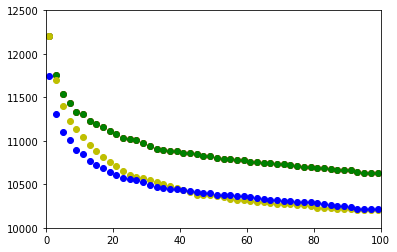

In [72]:
mean1 = readVector(r'results/h1/mean1.txt')
mean2 = readVector(r'results/h1/mean2.txt')
mean3 = readVector(r'results/h1/mean3.txt')
mean4 = readVector(r'results/h1/mean4.txt')

plt.plot(range(1,100,2), mean1, 'ro',range(1,100,2), mean2, 'go',range(1,100,2), mean3, 'yo',range(1,100,2), mean4, 'bo')
plt.axis([0, 100, 10000, 12500])
plt.show()

In [82]:
print("Hipoteza 1: Jak liczba iteracji wpływa na jakość rozwiązania? - przypadek 1 - algorytm - SimpleAco")

seedCount = 1
iterationCount = 10
iterationJump = 2

cases =[
r'datasets\A\A-n36-k5.vrp']



#hyp1_1 = [[[0 for z in range(len(cases))] for x in range(seedCount)] for y in range(0,math.floor(iterationCount/iterationJump))] 
hyp1_11 = np.zeros((math.floor(iterationCount/iterationJump), seedCount, len(cases)))


for cas in range(len(cases)):
    for it in range(1,iterationCount+1,iterationJump):
        print(it)
        for seed in range(seedCount):
            algorithm = SimpleAco(cvrp.load_case(cases[cas]), ants_count=20, max_iterations=it, alpha=2, beta=5, evaporation_rate=0.6, pheromone_amount=0, seed = seed)
            solution, path = algorithm.compute(log_level=0)
            hyp1_11[math.floor(it/iterationJump)][seed][cas] = solution

sums = np.zeros((math.floor(iterationCount/iterationJump), seedCount))
for seed in range(seedCount):
    for it in range(1,iterationCount+1,iterationJump):
        sums[math.floor(it/iterationJump),seed] = np.sum(hyp1_11[math.floor(it/iterationJump),seed,:])

mean11 = np.zeros(len(sums))
sd11 = np.zeros(len(sums))
for i in range(len(sums)):
    mean11[i] = np.mean(sums[i,:])
    sd11[i] = np.std(sums[i,:])

hyp1_21 = np.zeros((math.floor(iterationCount/iterationJump), seedCount, len(cases)))

for cas in range(len(cases)):
    for it in range(1,iterationCount+1,iterationJump):
        print(it)
        for seed in range(seedCount):
            algorithm = AcoSigmaBestAnts(cvrp.load_case(cases[cas]), ants_count=20, max_iterations=it, alpha=2, beta=5, evaporation_rate=0.6, pheromone_amount=0, sigma = 5, seed = seed)
            solution, path = algorithm.compute(log_level=0)
            hyp1_21[math.floor(it/iterationJump)][seed][cas] = solution

sums = np.zeros((math.floor(iterationCount/iterationJump), seedCount))
for seed in range(seedCount):
    for it in range(1,iterationCount+1,iterationJump):
        sums[math.floor(it/iterationJump),seed] = np.sum(hyp1_21[math.floor(it/iterationJump),seed,:])

mean112 = np.zeros(len(sums))
sd112 = np.zeros(len(sums))
for i in range(len(sums)):
    mean112[i] = np.mean(sums[i,:])
    sd112[i] = np.std(sums[i,:])
print(mean11)
print(mean112)

Hipoteza 1: Jak liczba iteracji wpływa na jakość rozwiązania? - przypadek 1 - algorytm - SimpleAco
1
[1, 21, 25, 28, 31, 18, 30, 33, 23, 14, 2, 1, 6, 16, 4, 7, 35, 15, 29, 20, 34, 1, 11, 8, 27, 12, 26, 17, 1, 13, 10, 24, 3, 36, 9, 32, 1, 22, 19, 5, 1]
3
[1, 21, 25, 28, 31, 18, 30, 33, 23, 14, 2, 1, 6, 16, 4, 7, 35, 15, 29, 20, 34, 1, 11, 8, 27, 12, 26, 17, 1, 13, 10, 24, 3, 36, 9, 32, 1, 22, 19, 5, 1]
5
[1, 4, 7, 3, 36, 9, 16, 10, 32, 20, 2, 1, 17, 11, 27, 8, 6, 25, 1, 21, 29, 15, 35, 24, 13, 1, 34, 31, 18, 33, 23, 22, 19, 30, 28, 1, 12, 26, 14, 5, 1]
7
[1, 4, 7, 3, 36, 9, 16, 10, 32, 20, 2, 1, 17, 11, 27, 8, 6, 25, 1, 21, 29, 15, 35, 24, 13, 1, 34, 31, 18, 33, 23, 22, 19, 30, 28, 1, 12, 26, 14, 5, 1]
9
[1, 2, 25, 22, 19, 31, 18, 33, 23, 34, 20, 24, 7, 14, 1, 11, 8, 27, 21, 6, 1, 17, 26, 10, 29, 13, 4, 1, 28, 12, 36, 3, 35, 15, 9, 16, 1, 32, 5, 30, 1]
1
[1, 21, 25, 28, 31, 18, 30, 33, 23, 14, 2, 1, 6, 16, 4, 7, 35, 15, 29, 20, 34, 1, 11, 8, 27, 12, 26, 17, 1, 13, 10, 24, 3, 36, 9, 32, 

[1315.11616306 1215.43503063 1215.43503063 1215.43503063 1178.14865438]
[1315.11616306 1215.43503063 1215.43503063 1215.43503063 1178.14865438]
